#Principal Components Analysis (PCA) of natural images

The idea is that each subimage will be used as a statistical sample. We compute the outer product of each, and the average all samples to get an estimate of the autocovariance matrix.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib provides plot functions similar to MATLAB
import numpy as np
from skimage import color, filter # skimage is an image processing library

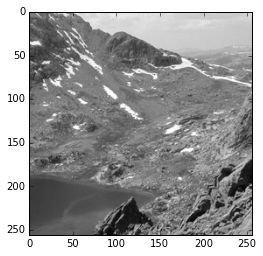

In [4]:
imFile = '../data/imgstat/alpine.png'
# imFile = '../data/imgstat/lake.jpg'
im = color.rgb2gray(plt.imread(imFile))
plt.imshow(im, 'gray')

##Break a large image into a series of 16x16 subimages

In [7]:
# Crop patches from image
patchSize = 16; nDim = patchSize ** 2;
w = im.shape[0]; h = im.shape[1];
nx = im.shape[0] / patchSize; ny = im.shape[1] / patchSize
nSamples = nx * ny

patches = np.zeros((nDim, nSamples)) # column vectors
[X, Y] = np.meshgrid(np.arange(0, w, patchSize), np.arange(0, h, patchSize))
X = X.flatten(); Y = Y.flatten()
for i in range(X.size):
    x = X[i]
    y = Y[i]
    patch = im[x:x+patchSize, y:y+patchSize]
    patch = patch - patch.mean()
    patches[:,i] = patch.flatten().T

## Calculate autocovariance matrix

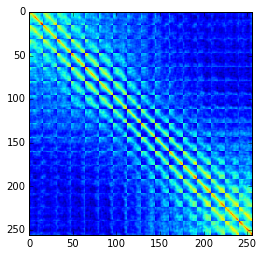

In [9]:
autoCov = np.dot(patches, patches.T) / (nx * ny)
plt.imshow(autoCov)
# io.imshow(patches[0])

##Calculate the eigenvectors and eigenvalues of the autocovariance matrix

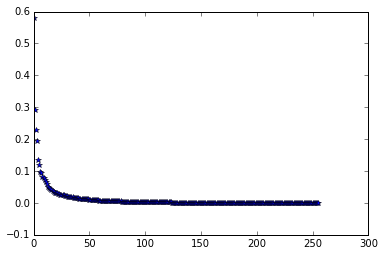

In [10]:
[eigenVals, eigenVecs] = np.linalg.eig(autoCov)
plt.plot(eigenVals, '*')

##Display the first 16 eigenvectors as "eigenpictures"

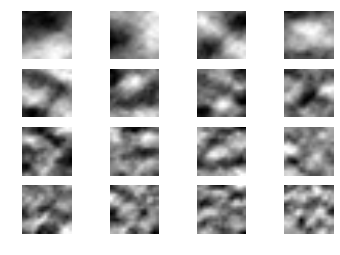

In [13]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(eigenVecs[:,i].reshape((patchSize, patchSize)), 'gray')
    plt.axis('off')

##Oja's weight normalization rule for Hebbian learning 
Oja's rule can be used to iteratively estimate the first principle component

$$ \Delta w_i = \alpha (x_i y - y^2 w_i), \; i= 1,...,n. $$

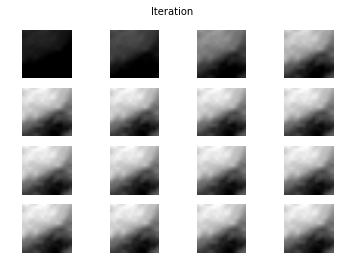

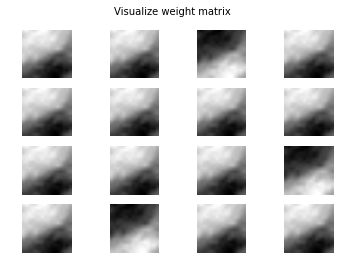

In [19]:
learningRate = 0.01
# Randomly initialize the weight matrix
W = np.random.rand(16, nDim)
nIter = 16
X = patches
plt.figure()
plt.suptitle('Iteration')
for i in range(nIter):
    plt.subplot(4,4,i+1)
    for j in range(nSamples):
        x = X[:,j]
        y = np.dot(W, x)
        # W: (16, 256), y: (16, 1), x: (256, 1)
        # inc = learningRate * (np.outer(y, x.T) - W * np.repeat(y * y,256).reshape(16,256))
        inc = learningRate * (np.outer(y, x.T) - W * np.tile((y * y)[:,np.newaxis],(1,256)))
        W += inc
    plt.imshow(W[0,:].reshape((patchSize, patchSize)), 'gray')
    plt.axis('off')


plt.figure()
plt.suptitle('Visualize weight matrix')
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(W[i,:].reshape((patchSize, patchSize)), 'gray')
    plt.axis('off')